<a href="https://colab.research.google.com/github/cslm1/fastai/blob/main/weed_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fastbook

     |████████████████████████████████| 719 kB 4.8 MB/s 
     |████████████████████████████████| 1.2 MB 41.6 MB/s 
     |████████████████████████████████| 197 kB 53.3 MB/s 
     |████████████████████████████████| 60 kB 5.8 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastbook import *
from fastai.vision.widgets import *
import fastai

In [3]:
ims = search_images_ddg(term = "Bathurst Burr")

In [4]:
ims_pasture = search_images_ddg("phalaris pasture")

In [5]:
! mkdir "./images"

In [6]:
plant_types = "bathurst_burr", "pasture"
path = Path("images")

In [7]:
for o in plant_types:
  dest = (path/o)
  dest.mkdir(exist_ok=True)
  if o == "bathurst_burr":
    download_images(dest, urls=ims)
  if o == "pasture":
    download_images(dest, urls = ims_pasture)

In [8]:
things_to_verify = get_image_files(path)

failed = verify_images(things_to_verify)

failed.map(Path.unlink)

(#2) [None,None]

In [9]:
weeds = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [10]:
dls = weeds.dataloaders(path)

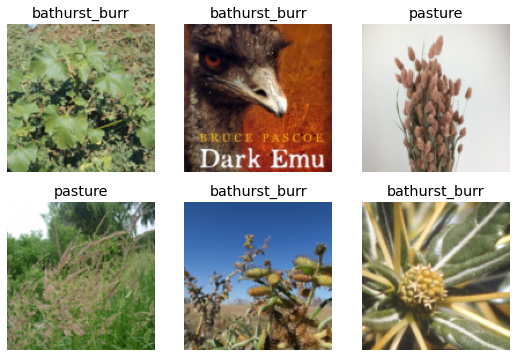

In [11]:
dls.valid.show_batch(max_n = 6)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.186851,1.905154,0.500000,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.756682,0.638296,0.197368,00:11
1,0.624472,0.355877,0.118421,00:11
2,0.497418,0.275921,0.078947,00:12
3,0.396209,0.261284,0.078947,00:11


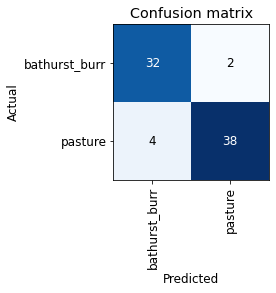

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

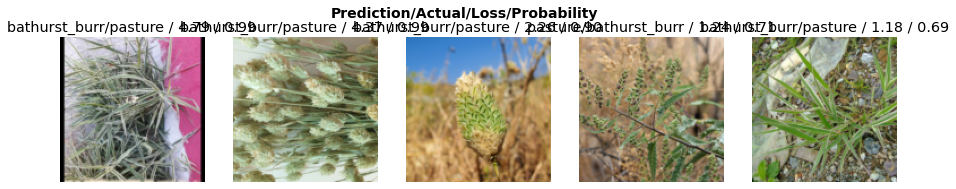

In [14]:
interp.plot_top_losses(5, nrows=1)